In [39]:
#import packages
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [40]:
#generate the data using make_blods(), a convience function in sckit-learn to generate synthetic clusters
features, true_labes= make_blobs(n_samples=200, centers=3, cluster_std=2.75, random_state=42)

In [41]:
# printing five elements for each of the variable returned by make_blobs.
print(features[:5])
print(true_labes[:5])

[[  9.77075874   3.27621022]
 [ -9.71349666  11.27451802]
 [ -6.91330582  -9.34755911]
 [-10.86185913 -10.75063497]
 [ -8.50038027  -4.54370383]]
[1 0 2 2 2]


In [42]:
#the values for all features must be transforemed to the same scale, the processs of transforming numerical features to use the sam scale is known as features scaling or normalizing the data 
scaler= StandardScaler()
scaled_features= scaler.fit_transform(features)
print(scaled_features[:5])

[[ 2.13082109  0.25604351]
 [-1.52698523  1.41036744]
 [-1.00130152 -1.56583175]
 [-1.74256891 -1.76832509]
 [-1.29924521 -0.87253446]]


In [43]:
#initiate the kmeans class
kmeans= KMeans(init="random", n_clusters=3, n_init=10, max_iter=3000, random_state=43)

In [44]:
#the next step is to fit the nidel with the scaled data
kmeans.fit(scaled_features)

KMeans(init='random', max_iter=3000, n_clusters=3, random_state=43)

In [45]:
#statistic from the initialization run with the lowest SSE are aviable as attribute pf(point function) kmeans after callling .fit
kmeans.inertia_

74.57960106819853

In [46]:
#the cluster assigment are stored a one-dimentional numpy array
print (kmeans.labels_[:5])
print(true_labes[:5])

[2 1 0 0 0]
[1 0 2 2 2]


In [47]:
#running elbow method to find a appopiate number of clusters
kmean_kwargs ={"init" : "random","n_init":10, "max_iter":300,"random_state":42}

#create empty list to hold the SSE for each k 
number_of_clusters=20
sse=[]
for k in range(1,number_of_clusters):
        kmeans= KMeans(n_clusters=k, **kmean_kwargs)
        kmeans.fit(scaled_features)
        sse.append(kmeans.inertia_)

14.047868159816192


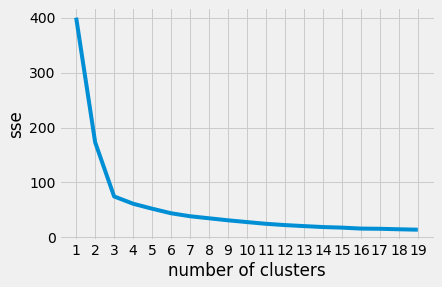

In [50]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,number_of_clusters),sse)
plt.xticks(range(1,number_of_clusters))
plt.xlabel("number of clusters")
plt.ylabel("sse")
print(sse[18])